In [103]:
library(readxl)

hawaii <- read_excel('../data/hawaii-5-11-22.xls', sheet = 'Complete') # [, c(3, 5:7, 9:17)]

Warning message:
"Expecting logical in W1463 / R1463C23: got 'HISTORICAL [21288]'"
Warning message:
"Expecting logical in W1464 / R1464C23: got 'HISTORICAL [21288]'"
Warning message:
"Expecting logical in W1465 / R1465C23: got 'HISTORICAL [21288]'"
Warning message:
"Expecting logical in W1466 / R1466C23: got 'HISTORICAL [21288]'"
Warning message:
"Expecting logical in W1467 / R1467C23: got 'HISTORICAL [21288]'"
Warning message:
"Expecting logical in W1468 / R1468C23: got 'HISTORICAL [21288]'"
Warning message:
"Expecting logical in W1469 / R1469C23: got 'HISTORICAL [21288]'"
Warning message:
"Expecting logical in W1470 / R1470C23: got 'HISTORICAL [21288]'"
Warning message:
"Expecting logical in W1471 / R1471C23: got 'HISTORICAL [21288]'"
Warning message:
"Expecting logical in W1472 / R1472C23: got 'HISTORICAL [21288]'"
Warning message:
"Expecting logical in W1473 / R1473C23: got 'HISTORICAL [21288]'"
Warning message:
"Expecting logical in W1474 / R1474C23: got 'HISTORICAL [21288]'"
Warn

In [110]:
library(tidyverse)

numerical_data <- hawaii %>% select_if(is.numeric) # Filter out non-numerical fields
imputated_data <- numerical_data %>% mutate_all(~ ifelse(is.na(.x), median(.x, na.rm = T), .)) # Impute missing values with median

data <- Filter(function(x) sd(x, na.rm = TRUE) != 0, imputated_data)

# head(imputated_data)

Warning message:
"ggrepel: 86 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


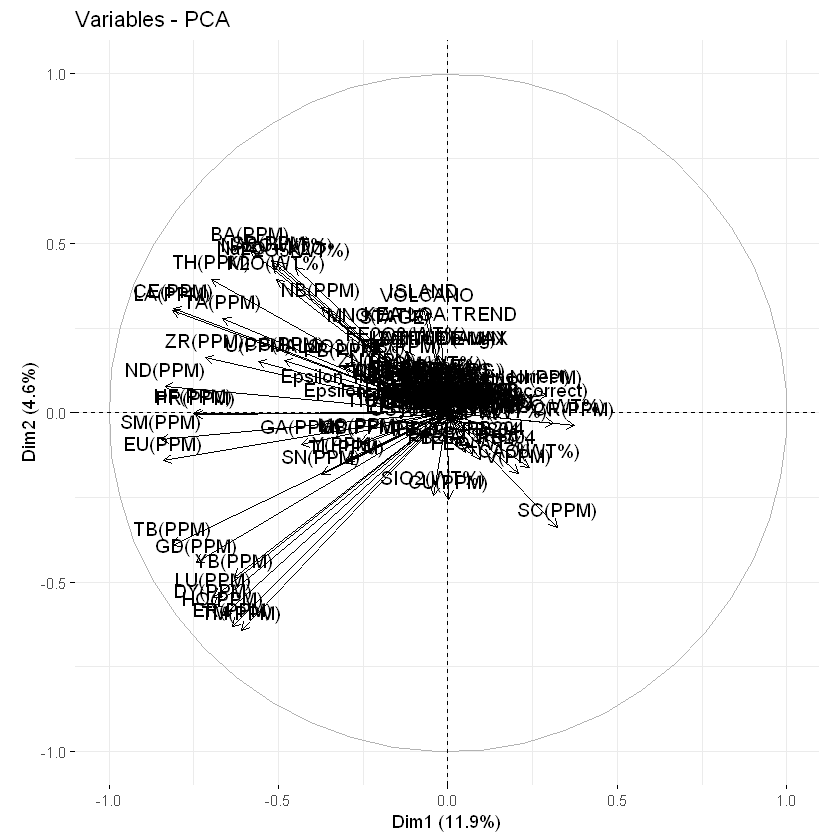

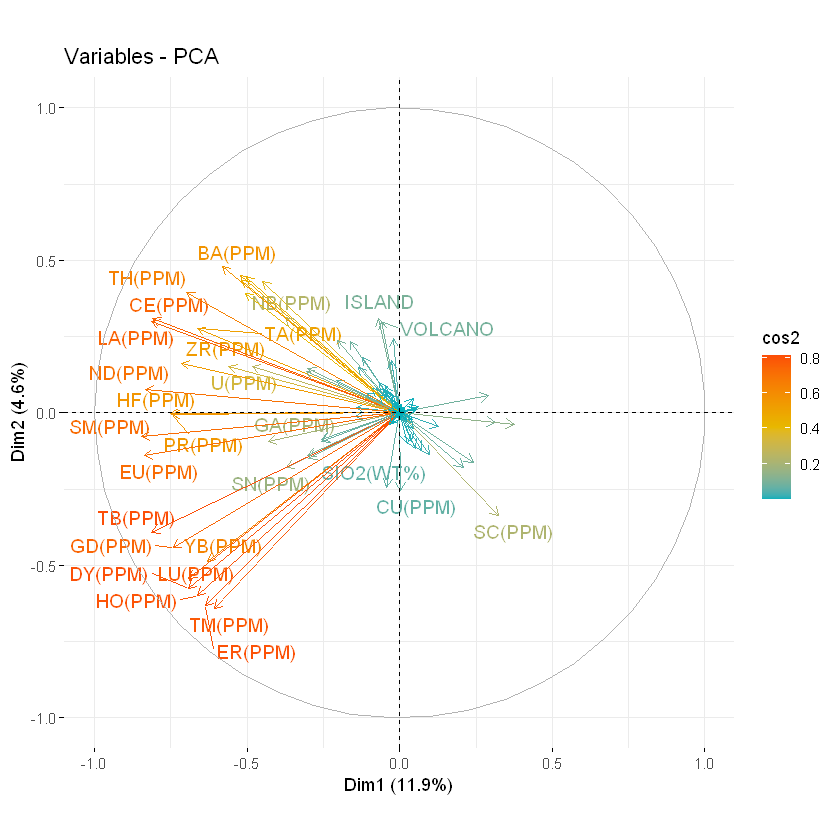

In [114]:
library(factoextra)

pca <- prcomp(data, scale = TRUE)

fviz_pca_var(pca, col.var = 'black')
fviz_pca_var(pca, col.var = 'cos2', gradient.cols = c('#00AFBB', '#E7B800', '#FC4E07'), repel = TRUE)

# Random Experiments

In [99]:
df <- data.frame(team=c('A', 'B', 'C', 'D', 'E'),
                 points=c(99, NA, NA, 88, 95),
                 assists=c(33, 28, 31, 39, 34),
                 rebounds=c(30, 28, 24, 24, NA))

new_df <- df[, colSums(is.na(df)) == 0]
df
new_df

team,points,assists,rebounds
<chr>,<dbl>,<dbl>,<dbl>
A,99,33,30
B,NA,28,28
C,NA,31,24
D,88,39,24
E,95,34,NA


team,assists
<chr>,<dbl>
A,33
B,28
C,31
D,39
E,34


In [ ]:
library(tidyverse)

df <- as.data.frame(hawaii)
temp <- df[, colSums(is.na(df)) == 0]
head(df)

# temp <- hawaii[complete.cases(hawaii), ]
# head(temp)

cols <- unlist(lapply(hawaii, is.numeric))
numeric <- hawaii[, cols]

# head(hawaii)